In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.style.use("seaborn-v0_8")
sns.set_theme()
pd.set_option("display.max_columns", 100)


## Определение путей к данным

- Создаётся базовый путь к папке с результатами:

  ```python
  BASE_PATH = "./results"
  ```

- Формируется словарь paths, содержащий пути к файлам в формате Parquet:

  - `metadata` → метаданные с применёнными UDF: `metadata_with_udf.parquet`

  - `covid_only` → данные, отфильтрованные только по COVID: `covid_only.parquet`

  - `query1` → результаты первого запроса (топ пациентов): `query1_top_patients.parquet`

  - `query2` → результаты второго запроса (join представлений): `query2_views_join.parquet`

  - `query3` → результаты третьего запроса (статистика по COVID): `query3_covid_stats.parquet`

  - `kmeans` → результаты кластеризации KMeans: `kmeans_clusters.parquet`

In [32]:
BASE_PATH = "./results"

paths = {
    "metadata": f"{BASE_PATH}/metadata_with_udf.parquet",
    "covid_only": f"{BASE_PATH}/covid_only.parquet",
    "query1": f"{BASE_PATH}/query1_top_patients.parquet",
    "query2": f"{BASE_PATH}/query2_views_join.parquet",
    "query3": f"{BASE_PATH}/query3_covid_stats.parquet",
    "kmeans": f"{BASE_PATH}/kmeans_clusters.parquet",
}

## Загрузка данных из файлов Parquet

- Загружаются данные в DataFrame с помощью `pandas.read_parquet`:

  - `metadata` ← данные из `metadata_with_udf.parquet`

  - `covid_only` ← данные из `covid_only.parquet`

  - `query1` ← данные из `query1_top_patients.parquet`

  - `query2` ← данные из `query2_views_join.parquet`

  - `query3` ← данные из `query3_covid_stats.parquet`

  - `kmeans` ← данные из `kmeans_clusters.parquet`

- После загрузки выводится сообщение:


In [ ]:
metadata = pd.read_parquet(paths["metadata"])
covid_only = pd.read_parquet(paths["covid_only"])
query1 = pd.read_parquet(paths["query1"])
query2 = pd.read_parquet(paths["query2"])
query3 = pd.read_parquet(paths["query3"])
kmeans = pd.read_parquet(paths["kmeans"])

print("Данные загружены.")

✅ Данные загружены.


## Визуализация распределения возраста пациентов

- Создние графика распределения возрастов всех пациентов:
  - Используется `sns.histplot` для построения гистограммы:
    - Данные: столбец `"age"` из DataFrame `metadata`

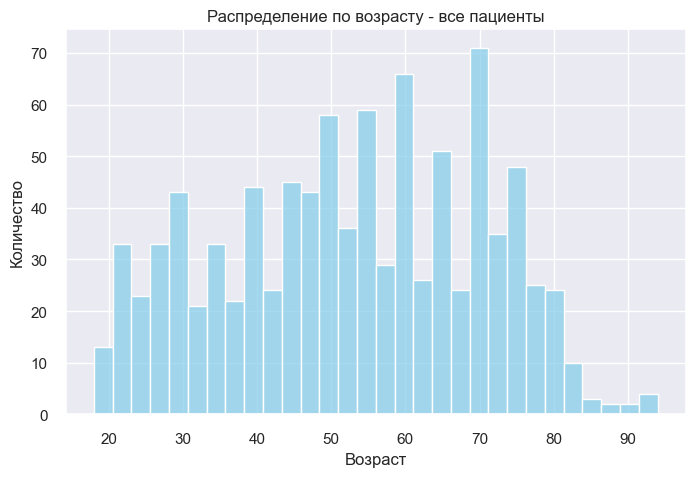

In [27]:
plt.figure(figsize=(8,5))
sns.histplot(metadata["age"], bins=30, color="skyblue")
plt.title("Распределение по возрасту - все пациенты")
plt.xlabel("Возраст")
plt.ylabel("Количество")
plt.show()

## Визуализация распределения возраста пациентов с COVID-19

- Создаётся график распределения возрастов пациентов с диагнозом COVID-19:
  - Используется `sns.histplot` для построения гистограммы:
    - Данные: столбец `"age"` из DataFrame `covid_only`.

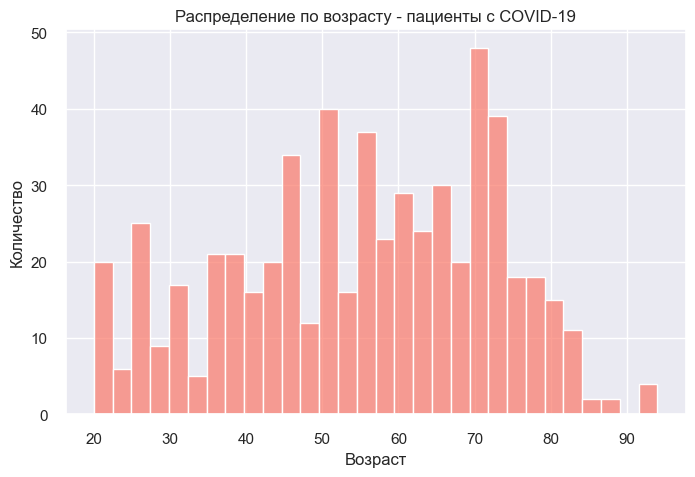

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(covid_only["age"], bins=30, color="salmon")
plt.title("Распределение по возрасту - пациенты с COVID-19")
plt.xlabel("Возраст")
plt.ylabel("Количество")
plt.show()

## Boxplot возрастов по возрастным категориям

- Создаётся `boxplot` для визуализации распределения возрастов в разных возрастных категориях:
  - Используется `sns.boxplot`:
    - Ось X: категориальная переменная `"age_category"` из DataFrame `metadata`.

C:\Users\Dell\AppData\Local\Temp\ipykernel_25020\3502211692.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




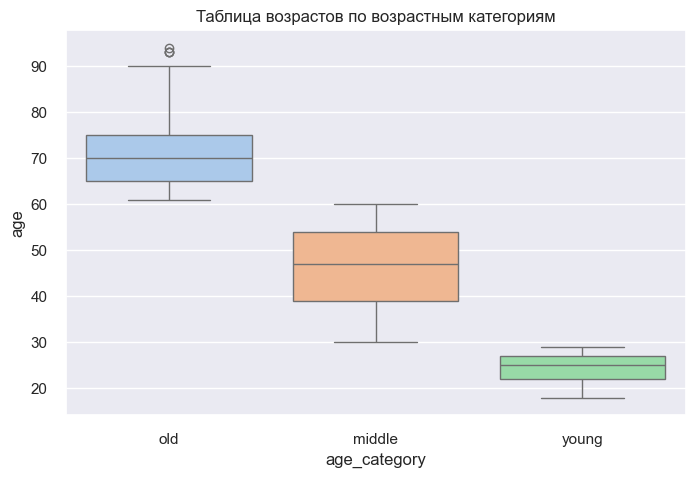

In [25]:
plt.figure(figsize=(8,5))
sns.boxplot(x="age_category", y="age", data=metadata, palette="pastel")
plt.title("Таблица возрастов по возрастным категориям")
plt.show()

## Круговая диаграмма распределения диагнозов

- Создаётся круговая диаграмма с помощью библиотеки **Plotly Express**:
  - Источник данных: DataFrame `metadata`.

In [14]:
fig = px.pie(
    metadata,
    names="finding_unified",
    title="Распределение диагнозов (finding_unified)",
    hole=0.4
)
fig.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_25020\456828387.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




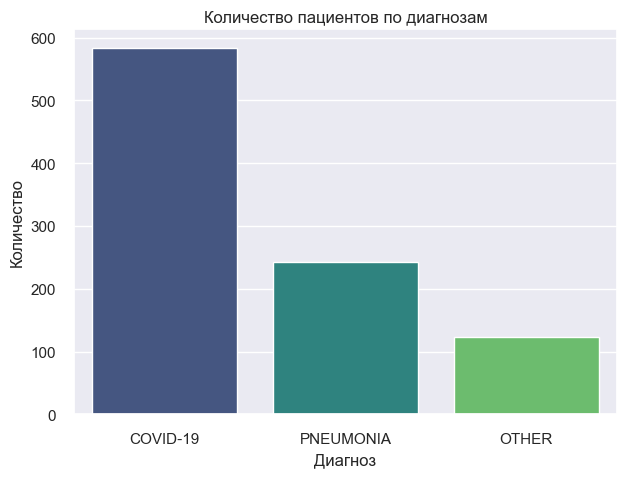

In [15]:
diag_counts = metadata["finding_unified"].value_counts()
plt.figure(figsize=(7,5))
sns.barplot(x=diag_counts.index, y=diag_counts.values, palette="viridis")
plt.title("Количество пациентов по диагнозам")
plt.xlabel("Диагноз")
plt.ylabel("Количество")
plt.show()

In [16]:
fig = px.pie(
    metadata,
    names="sex",
    title="Распределение пола пациентов",
    hole=0.4
)
fig.show()


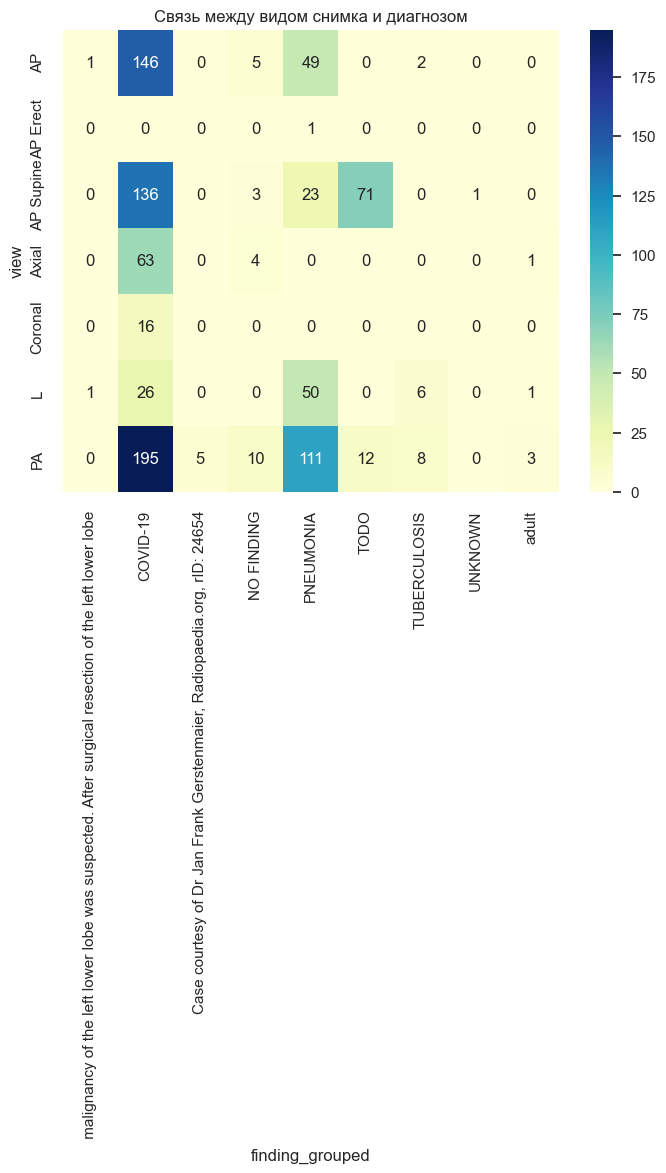

In [17]:

heatmap_data = query2.groupby(["view", "finding_grouped"]).size().unstack().fillna(0)

plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Связь между видом снимка и диагнозом")
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_25020\2854391485.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




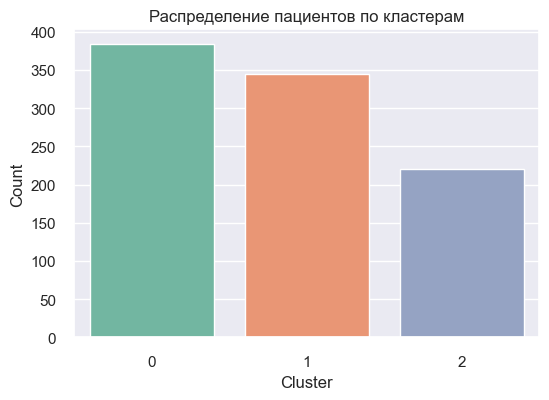

In [18]:
cluster_counts = kmeans["prediction"].value_counts().sort_index()

plt.figure(figsize=(6,4))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="Set2")
plt.title("Распределение пациентов по кластерам")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

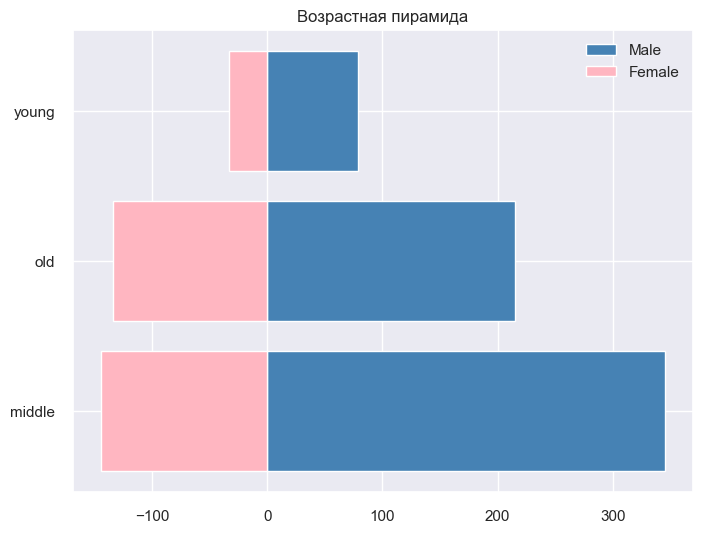

In [ ]:
pyramid_data = metadata.groupby(["age_category", "sex"]).size().unstack().fillna(0)

pyramid_data.loc[:, "F"] = -pyramid_data.loc[:, "F"]

plt.figure(figsize=(8,6))
plt.barh(pyramid_data.index, pyramid_data["M"], color="steelblue", label="Male")
plt.barh(pyramid_data.index, pyramid_data["F"], color="lightpink", label="Female")
plt.title("Возрастная пирамида")
plt.legend()
plt.show()

In [20]:
top_patients = query1.groupby("finding_grouped").apply(lambda g: g.sort_values("age", ascending=False).head(10))
top_patients

C:\Users\Dell\AppData\Local\Temp\ipykernel_25020\1659126470.py:1: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



patientid  \
finding_grouped                                                    
 malignancy of the left lower lobe was suspecte... 0         481   
                                                   1         481   
COVID-19                                           2        326b   
                                                   5        324b   
                                                   3        324b   
...                                                          ...   
adult                                              945       397   
                                                   946       397   
                                                   947       128   
                                                   948        46   
                                                   949       108   

                                                                                          finding_grouped  \
finding_grouped                                                                                             
 malignancy of the left lower lobe was suspecte... 0     malignancy of the left lower lobe was suspect...   
                                                   1     malignancy of the left lower lobe was suspect...   
COVID-19                                           2                                             COVID-19   
                                                   5                                             COVID-19   
                                                   3                                             COVID-19   
...                                                                                                   ...   
adult                                              945                                              adult   
                                                   946                                              adult   
                                                   947                                              adult   
                                                   948                                              adult   
                                                   949                                              adult   

                                                         age  rank  
finding_grouped                                                     
 malignancy of the left lower lobe was suspecte... 0    50.0     1  
                                                   1    50.0     2  
COVID-19                                           2    94.0     1  
                                                   5    93.0     4  
                                                   3    93.0     2  
...                                                      ...   ...  
adult                                              945  55.0     1  
                                                   946  55.0     2  
                                                   947  55.0     3  
                                                   948  55.0     4  
                                                   949  50.0     5  

[63 rows x 4 columns]

In [21]:
covid_percent = query3.iloc[0]["covid_percent"]

fig = px.pie(
    names=["COVID-19", "Other"],
    values=[covid_percent, 100-covid_percent],
    title=f"Процент COVID-19 в выборке: {covid_percent}%"
)
fig.show()

In [22]:
grouped = metadata.groupby("finding_unified").agg({
    "age": "mean",
    "temperature": "mean",
    "pO2_saturation": "mean"
})

grouped

,age,temperature,pO2_saturation
finding_unified,,,
COVID-19,54.986301,39.049206,76.823000
OTHER,48.709677,37.912500,87.166667
PNEUMONIA,49.446281,38.671429,87.300000


In [23]:
import ipywidgets as widgets
from IPython.display import display

diagnoses = metadata["finding_unified"].dropna().unique().tolist()

dropdown = widgets.Dropdown(
    options=diagnoses,
    description='Diagnosis:'
)

output = widgets.Output()

def update_table(change):
    with output:
        output.clear_output()
        selected = change.new
        display(metadata[metadata["finding_unified"] == selected].head())

dropdown.observe(update_table, names='value')

display(dropdown, output)

Dropdown(description='Diagnosis:', options=('COVID-19', 'PNEUMONIA', 'OTHER'), value='COVID-19')

Output()